# import

In [ ]:
#!pip install scanpy
import numpy as np
import pandas as pd
import matplotlib.pyplot as pl
from matplotlib import rcParams
import scanpy as sc

In [ ]:
sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()
sc.settings.set_figure_params(dpi=80, facecolor='white')

scanpy==1.9.1 anndata==0.8.0 umap==0.5.3 numpy==1.21.6 scipy==1.4.1 pandas==1.3.5 scikit-learn==1.0.2 statsmodels==0.10.2 pynndescent==0.5.6


In [ ]:
%%bash
cp /content/drive/MyDrive/CRLM/CRLM.zip /content/
unzip CRLM.zip

Archive:  CRLM.zip
  inflating: CRLM/GSE164522_CRLM_LN.h5ad  
  inflating: CRLM/GSE164522_CRLM_MN.h5ad  
  inflating: CRLM/GSE164522_CRLM_MT.h5ad  
  inflating: CRLM/GSE164522_CRLM_PBMC.h5ad  
  inflating: CRLM/GSE164522_CRLM_PN.h5ad  
  inflating: CRLM/GSE164522_CRLM_PT.h5ad  


In [ ]:
!git clone https://github.com/bioinfo-ibms-pumc/SCSA.git

Cloning into 'SCSA'...
remote: Enumerating objects: 154, done.
remote: Counting objects: 100% (31/31), done.
remote: Compressing objects: 100% (31/31), done.
remote: Total 154 (delta 17), reused 0 (delta 0), pack-reused 123
Receiving objects: 100% (154/154), 21.19 MiB | 12.18 MiB/s, done.
Resolving deltas: 100% (86/86), done.


# Analysis

In [ ]:
import anndata
adata_PT=anndata.read_h5ad("CRLM/GSE164522_CRLM_PT.h5ad")
adata_MT=anndata.read_h5ad("CRLM/GSE164522_CRLM_MT.h5ad")
adata_PT,adata_MT

(AnnData object with n_obs × n_vars = 37529 × 24662
     obs: 'n_genes', 'percent_mito', 'n_counts', 'louvain', 'sample', 'patient', 'tissue', 'ID', 'celltype_global', 'celltype_major', 'celltype_sub',
 AnnData object with n_obs × n_vars = 37359 × 24662
     obs: 'n_genes', 'percent_mito', 'n_counts', 'louvain', 'sample', 'patient', 'tissue', 'ID', 'celltype_global', 'celltype_major', 'celltype_sub')

In [ ]:
set(adata_PT.obs['patient'])

{'patient08',
 'patient09',
 'patient10',
 'patient11',
 'patient12',
 'patient13',
 'patient14',
 'patient15',
 'patient16',
 'patient17'}

In [ ]:
set(adata_MT.obs['patient'])

{'patient08',
 'patient09',
 'patient10',
 'patient11',
 'patient12',
 'patient13',
 'patient14',
 'patient15',
 'patient16',
 'patient17'}

In [ ]:
adata_PT_B=adata_PT[adata_PT.obs['patient'].str.contains('patient10')]
adata_MT_B=adata_MT[adata_MT.obs['patient'].str.contains('patient10')]

In [ ]:
set(adata_PT_B.obs['celltype_global'])

{'CD45-', 'Lymphoid-B', 'Lymphoid-T-NK', 'MAST', 'Myeloid'}

In [ ]:
adata_PT_B.obs['new_sample']='PT'
adata_MT_B.obs['new_sample']='MT'

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  


In [ ]:
adata=anndata.concat([adata_PT_B,adata_MT_B])
adata

AnnData object with n_obs × n_vars = 5533 × 24662
    obs: 'n_genes', 'percent_mito', 'n_counts', 'louvain', 'sample', 'patient', 'tissue', 'ID', 'celltype_global', 'celltype_major', 'celltype_sub', 'new_sample'

In [ ]:
adata.obs.head()

,n_genes,percent_mito,n_counts,louvain,sample,patient,tissue,ID,celltype_global,celltype_major,celltype_sub,new_sample
AAACCTGAGCCGATTT-19,2878,0.030947,3013.5530,17,primary tumor,patient10,primary tumor,19,Lymphoid-T-NK,CD4 T,hC29_CD4_MKI67,PT
AAACCTGAGCTATGCT-19,1899,0.024070,2656.1940,1,primary tumor,patient10,primary tumor,19,Lymphoid-T-NK,CD4 T,hC22_CD4_Trm-CXCR6,PT
AAACCTGGTAGGCATG-19,2438,0.040717,2943.3118,25,primary tumor,patient10,primary tumor,19,Myeloid,Monocyte,hC43_MonoDC-CLEC10A,PT
AAACCTGGTCCATCCT-19,2462,0.027618,3104.0470,12,primary tumor,patient10,primary tumor,19,Lymphoid-T-NK,CD4 T,hC26_CD4_Tfr-IL10,PT
AAACCTGGTTACGGAG-19,1442,0.039368,2523.7500,13,primary tumor,patient10,primary tumor,19,Lymphoid-T-NK,CD8 T,hC07_CD8_IEL-CD160,PT


In [ ]:
adata_w=adata.obs['new_sample']+'-'+adata.obs['celltype_global'].astype(str)
adata_w.to_csv('adata_meta.txt',sep='\t')

In [ ]:
adata_count=adata.to_df()
adata_count.T.to_csv('adata_count.txt',sep='\t')

In [ ]:
!cellphonedb method statistical_analysis /content/adata_meta.txt /content/adata_count.txt --counts-data=gene_name --threads 4
!zip -r cellphonedb_crlm_out.zip /content/out 

[ ][APP][08/05/22-15:24:04][WARNING] Latest local available version is `v2.0.0`, using it
[ ][APP][08/05/22-15:24:04][WARNING] User selected downloaded database `v2.0.0` is available, using it
[ ][CORE][08/05/22-15:24:04][INFO] Initializing SqlAlchemy CellPhoneDB Core
[ ][CORE][08/05/22-15:24:04][INFO] Using custom database at /root/.cpdb/releases/v2.0.0/cellphone.db
[ ][APP][08/05/22-15:24:04][INFO] Launching Method cpdb_statistical_analysis_local_method_launcher
[ ][APP][08/05/22-15:24:04][INFO] Launching Method _set_paths
[ ][APP][08/05/22-15:24:04][INFO] Launching Method _load_meta_counts
tcmalloc: large alloc 1091641344 bytes == 0x5bf92000 @  0x7f768829f1e7 0x7f7685a9d46e 0x7f7685aedc7b 0x7f7685aee35f 0x7f7685b90103 0x593835 0x548c51 0x5127f1 0x593dd7 0x5118f8 0x549576 0x593fce 0x5118f8 0x593dd7 0x5118f8 0x593dd7 0x5118f8 0x549576 0x593fce 0x548ae9 0x5127f1 0x549e0e 0x593fce 0x548ae9 0x5127f1 0x549e0e 0x4bca8a 0x532b86 0x594a96 0x548cc1 0x5127f1
[ ][APP][08/05/22-15:24:35][INFO] L

In [ ]:
nonSL=pd.read_csv('/content/Human_nonSL.csv')
nonSL.head()

,gene_a.name,gene_a.identifier,gene_b.name,gene_b.identifier,NonSL.cell_line,NonSL.pubmed_id,NonSL.source,NonSL.statistic_score
0,BRCA1,672,CHEK2,11200,A549,31300006,CRISPR/CRISPRi,0.69
1,BRCA2,675,CHEK2,11200,786O,31300006,CRISPR/CRISPRi,0.38
2,AKT1,207,CHEK2,11200,A549,31300006,CRISPR/CRISPRi,0.69
3,CHEK1,1111,CHEK2,11200,A375,31300006,CRISPR/CRISPRi,1.00
4,CDC73,79577,CNOT1,23019,K562,31300006,CRISPR/CRISPRi,0.13


In [ ]:
all_nonSL_gene=list(set(nonSL['gene_a.name']) & set(nonSL['gene_b.name']) & set(adata_concat.var_names))
all_nonSL_gene[:5]

['SEC22B', 'COPA', 'NOL9', 'DNMT1', 'EXOSC6']

In [ ]:
nonSL_res=nonSL[nonSL['gene_a.name'].isin(all_nonSL_gene) & nonSL['gene_b.name'].isin(all_nonSL_gene)]
nonSL_res.index=range(len(nonSL_res))
nonSL_res

,gene_a.name,gene_a.identifier,gene_b.name,gene_b.identifier,NonSL.cell_line,NonSL.pubmed_id,NonSL.source,NonSL.statistic_score
0,AKT1,207,CHEK2,11200,A549,31300006,CRISPR/CRISPRi,0.69
1,CHEK1,1111,CHEK2,11200,A375,31300006,CRISPR/CRISPRi,1.00
2,CDC73,79577,CNOT1,23019,K562,31300006,CRISPR/CRISPRi,0.13
3,CDK1,983,CNOT1,23019,Jurkat,31300006,CRISPR/CRISPRi,0.01
4,BTF3,689,CNOT1,23019,K562,31300006,CRISPR/CRISPRi,0.16
...,...,...,...,...,...,...,...,...
1934,NDUFA2,4695,SPATA5,166378,Jurkat,31300006,CRISPR/CRISPRi,0.04
1935,MRPL11,65003,SPATA5,166378,Jurkat,31300006,CRISPR/CRISPRi,0.00
1936,CDK1,983,SPATA5,166378,Jurkat,31300006,CRISPR/CRISPRi,0.04
1937,BUB1B,701,CEP63,80254,K562,31300006,CRISPR/CRISPRi,0.14


In [ ]:
for i in nonSL_res.index:
  test=nonSL_res.loc[i]
  break

In [ ]:
test['gene_a.name']

'AKT1'

In [ ]:
a=[]
for i in nonSL_res.index:
  test=nonSL_res.loc[i]
  #a=np.array(adata_concat[:,[test['gene_a.name']:test['gene_b.name']]].X.T)
  b=np.array(adata_concat[dpt_B_index,[test['gene_a.name'],test['gene_b.name']]].X.T)
  a.append(b)
c=np.array(a)

In [ ]:
np.save('nonSL_x1',c)

In [ ]:
SL=pd.read_csv('/content/Human_SL.csv')
SL.head()

,gene_a.name,gene_a.identifier,gene_b.name,gene_b.identifier,SL.cell_line,SL.pubmed_id,SL.source,SL.statistic_score
0,CYP1A2,1544,FKBP11,51303,K562;K562,20609354,GenomeRNAi,0.506
1,ABCB1,5243,FKBP11,51303,K562;K562,20609354,GenomeRNAi,0.506
2,CYP2C19,1557,FKBP11,51303,K562;K562,20609354,GenomeRNAi,0.506
3,CYP3A4,1576,FKBP11,51303,K562;K562,20609354,GenomeRNAi,0.506
4,ALB,213,FKBP11,51303,K562;K562,20609354,GenomeRNAi,0.506


In [ ]:
all_SL_gene=list(set(SL['gene_a.name']) & set(SL['gene_b.name']) & set(adata_concat.var_names))
all_SL_gene[:5]

['PTK6', 'COPA', 'CORO1B', 'NOL9', 'C11orf24']

In [ ]:
SL_res=SL[SL['gene_a.name'].isin(all_SL_gene) & SL['gene_b.name'].isin(all_SL_gene)]
SL_res.index=range(len(SL_res))
SL_res

,gene_a.name,gene_a.identifier,gene_b.name,gene_b.identifier,SL.cell_line,SL.pubmed_id,SL.source,SL.statistic_score
0,CYP1A2,1544,FKBP11,51303,K562;K562,20609354,GenomeRNAi,0.506
1,CYP2C19,1557,FKBP11,51303,K562;K562,20609354,GenomeRNAi,0.506
2,CYP3A4,1576,FKBP11,51303,K562;K562,20609354,GenomeRNAi,0.506
3,ALB,213,FKBP11,51303,K562;K562,20609354,GenomeRNAi,0.506
4,BCR,613,FKBP11,51303,K562;K562,20609354,GenomeRNAi,0.506
...,...,...,...,...,...,...,...,...
22207,PDGFRB,5159,PRKCQ,5588,K562;K562,20609354,GenomeRNAi,0.521
22208,BCR,613,PRKCQ,5588,K562;K562,20609354,GenomeRNAi,0.521
22209,ALB,213,PRKCQ,5588,K562;K562,20609354,GenomeRNAi,0.521
22210,KRAS,3845,SLC10A7,84068,COAD,24104479,Text Mining,0.600


In [ ]:
adata_concat[dpt_B_index,['CYP1A2','FKBP11']].X

ArrayView([[0.       , 2.5769057],
           [0.       , 2.3155527],
           [0.       , 2.49679  ],
           ...,
           [0.       , 0.       ],
           [0.       , 1.7746993],
           [0.       , 0.       ]], dtype=float32)

In [ ]:
a=[]
for i in SL_res.iloc[:2000].index:
  test=SL_res.loc[i]
  #a=np.array(adata_concat[:,[test['gene_a.name']:test['gene_b.name']]].X.T)
  b=np.array(adata_concat[dpt_B_index,[test['gene_a.name'],test['gene_b.name']]].X.T)
  a.append(b)
c=np.array(a)

In [ ]:
np.save('SL_x1',c)

In [ ]:
!cp /content/SL_x1.npy /content/drive/MyDrive/SL_GAN
!cp /content/nonSL_x1.npy /content/drive/MyDrive/SL_GAN

In [ ]:
!cp /content/CRLM_PT_MT_Bcell_patient10.h5ad /content/drive/MyDrive/SL_GAN
!cp /content/dpt_B_index.txt /content/drive/MyDrive/SL_GAN

In [ ]:
!cp /content/CRLM_PT_MT_Bcell.h5ad /content/drive/MyDrive/CRLM

In [ ]:
import anndata
adata_concat=anndata.read_h5ad('/content/drive/MyDrive/CRLM/CRLM_PT_MT_Bcell.h5ad')

In [ ]:
import scanpy as sc
adata=adata_concat
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)
adata.raw = adata
adata = adata[:, adata.var.highly_variable]
sc.tl.pca(adata, svd_solver='arpack')
sc.pp.neighbors(adata, n_neighbors=20, n_pcs=40)
sc.tl.leiden(adata)
max(set(adata.obs.leiden))

/usr/local/lib/python3.7/dist-packages/numba/np/ufunc/parallel.py:363: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  warnings.warn(problem)


'9'

In [ ]:
len(list(set(adata.obs.leiden)))

21

In [ ]:
sc.pp.pca(adata)
sc.pp.neighbors(adata,metric="cosine")
sc.tl.umap(adata,random_state=41822099)
adata.obs['leiden_anno'] = adata.obs['leiden']
#adata.obs['leiden_anno'].cat.categories = new_type
sc.set_figure_params(dpi=80,dpi_save=300,figsize=[4,4],color_map='RdYlGn_r')
sc.pl.umap(adata, color=['leiden_anno',],palette=sc.pl.palettes.vega_20_scanpy,wspace=0.5,legend_fontsize=8,)

ImportError: ignored

<Figure size 320x320 with 1 Axes>

In [ ]:
adata.obs['leiden_anno'].value_counts()

0     2197
1     1163
2     1086
3      974
4      947
5      931
6      774
7      771
8      634
9      606
10     576
11     535
12     474
13     402
14     368
15     362
16     328
17     240
18     211
19     196
20     115
Name: leiden_anno, dtype: int64

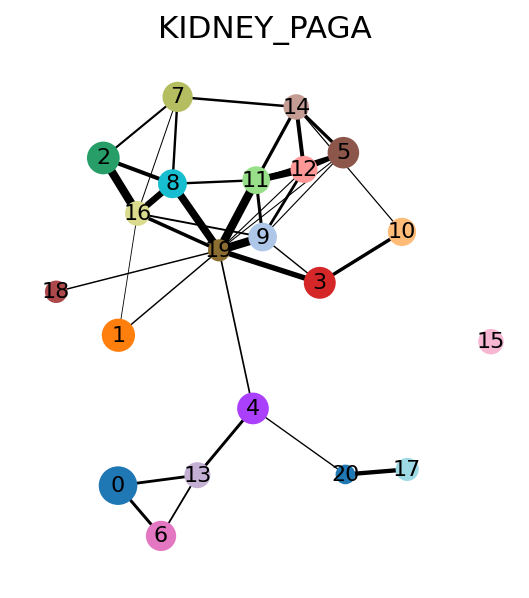

In [ ]:
sc.tl.diffmap(adata)
sc.pp.neighbors(adata, n_neighbors=20, use_rep='X_diffmap')
sc.set_figure_params(dpi=80,dpi_save=300,figsize=[4,4],color_map='RdYlGn_r')
sc.tl.paga(adata, groups='leiden_anno')
sc.pl.paga(adata, threshold=0.1,fontsize=10,fontweight='normal',frameon=False,edge_width_scale=0.5,random_state=43,save='kidney_trajectery.png',title='KIDNEY_PAGA')

In [ ]:
import numpy as np
adata.uns['iroot'] = np.flatnonzero(adata.obs['leiden_anno']  == '0')[0]
sc.tl.dpt(adata,)

In [ ]:

sc.tl.draw_graph(adata, init_pos='paga')


TypeError: ignored

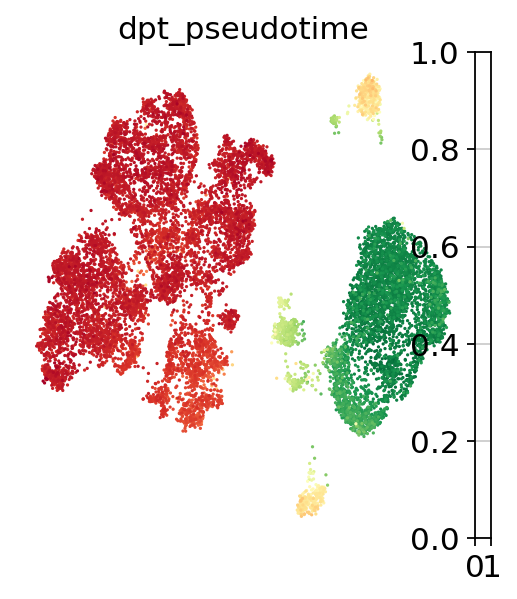

In [ ]:
sc.set_figure_params(dpi=80,dpi_save=300,figsize=[4,4],color_map='RdYlGn_r')
sc.pl.umap(adata, color=['dpt_pseudotime',],palette=sc.pl.palettes.vega_20_scanpy,wspace=0.2,legend_fontsize=8,add_outline=False,frameon=False,save='kidney_umap.png')
#sc.pl.draw_graph(adata, color=['batch','dpt_pseudotime'],palette=sc.pl.palettes.vega_20_scanpy,wspace=0.2,legend_fontsize=8,add_outline=False,frameon=False,save='kidney_dpt.png')

In [ ]:
adata.write_h5ad('bcell_dpt.h5ad',compression='gzip')

In [ ]:
import scanpy as sc
from SL_Function import SL_Analysis
import pandas as pd
import anndata
import numpy as np
#import data
adata=anndata.read_h5ad("bcell_dpt.h5ad")
SL_pd=pd.read_csv('sl-for-scrnaseq-full.csv')

In [ ]:
print('......Analysis SL_count')
adata_c=adata[adata.obs['batch']=='PT']
xl=adata_c.var.index.tolist()
SL=pd.DataFrame(columns=['gene1','gene2'])

#Get the intersection of SL input and the gene name of scRNA-seq
ret3= list(set(xl).intersection(SL_pd['gene1'].values))
for i in ret3:
    ret4=list(set(ret3).intersection(SL_pd.loc[SL_pd['gene1']==i]['gene2'].values))
    for j in ret4: 
        SL=SL.append({'gene1':i,'gene2':j},ignore_index=True)
ret5= list(set(xl).intersection(SL_pd['gene2'].values))
for i in ret5:
    ret6=list(set(ret5).intersection(SL_pd.loc[SL_pd['gene2']==i]['gene1'].values))
    for j in ret6: 
        SL=SL.append({'gene1':j,'gene2':i},ignore_index=True)
SL=SL.drop_duplicates(keep='first')

......Analysis SL_count


In [ ]:
#Drop out the same gene of SL
sl_len=len(SL)
for i in range(sl_len):
    if(i==sl_len):
        break
    if(SL.iloc[i]['gene1']==SL.iloc[i]['gene2']):
        print('......The same name of gene loc in',i)
        SL=SL.drop(SL.iloc[i].name)
        sl_len-=1

#Get the result of the pair of SL
SL_li=SL['gene1'].values.tolist()+SL['gene2'].values.tolist()
SL_li=list(set(SL_li))

......The same name of gene loc in 226


In [ ]:
#Count
SL_count=pd.DataFrame()
SL_count['X']=adata_c.obs.dpt_pseudotime
SL_count_value=pd.DataFrame(adata_c[:,SL_li].X,columns=SL_li,index=adata_c.obs.index)
SL_count=pd.concat([SL_count,SL_count_value],axis=1)
SL_count.head()

,X,SESN1,CDC42EP2,RAD51B,CA2,LMNA,TUBA1A,STAP1,MCTP1,ZNF860,...,GNB4,KCNQ5,TLR6,ZDHHC23,NPTX2,NTNG1,CREB5,BMPR1A,SOD2,RYK
AAATGCCGTACTTGAC-3-PT,0.023653,2.361920,0.0,0.0,0.0,0.000000,0.0,2.361920,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AACGTTGGTCTGATCA-3-PT,0.183571,0.000000,0.0,0.0,0.0,0.000000,0.0,1.983121,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AACGTTGTCAGTCCCT-3-PT,0.983694,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAGTCTGGTACCGAGA-3-PT,0.939626,1.692944,0.0,0.0,0.0,1.692944,0.0,0.000000,0.0,0.0,...,0.0,0.0,1.692944,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AATCCAGTCCGGGTGT-3-PT,0.913618,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
SL_count_sort=SL_count.sort_values(by='X')
print('......Analysis SL_slope')
import scipy.stats as stats
slope_pd=pd.DataFrame(columns=['slope', 'intercept', 'r_value', 'p_value', 'std_err','average','active','sig'])
for i in SL_count_sort.columns[1:]: 
    if len(SL_count_sort[SL_count_sort[i]!=0].values)==0:
        slope, intercept, r_value, p_value, std_err=0,0,0,0,0
    else:  
        slope, intercept, r_value, p_value, std_err=stats.linregress(SL_count_sort[SL_count_sort[i]!=0]['X'].values, SL_count_sort[SL_count_sort[i]!=0][i].values)
    average=np.average(SL_count_sort[i].values)
    active='T'
    if(average <0.01 and average>-0.01):
        active='F'
    sig='normal'
    
    if(slope>0):
        sig='high'
    elif(slope<0):
        sig='low'
    slope_pd.loc[i]=[slope, intercept, r_value, p_value, std_err,average,active,sig]


......Analysis SL_slope


In [ ]:
print('......Analysis SL_p')
SL_p=pd.DataFrame(columns=['dp','type'])
for i in range(len(SL)):
    test=[]
    g1,g2=(SL.iloc[i]['gene1']),(SL.iloc[i]['gene2'])
    #test.append(SL_count_sort[g1].values)
    #test.append(SL_count_sort[g2].values)
    #test=np.array(test)
    ty=0
    if(slope_pd.loc[g1]['active']=='T' and slope_pd.loc[g1]['sig']=='high'):
        if(slope_pd.loc[g2]['active']=='F'):
            ty=1
        elif(slope_pd.loc[g2]['active']=='T' and slope_pd.loc[g2]['sig']=='high'):
            ty=4
        elif(slope_pd.loc[g2]['active']=='T' and slope_pd.loc[g2]['sig']=='low'):
            ty=3
    if(slope_pd.loc[g1]['active']=='T' and slope_pd.loc[g1]['sig']=='low'):
        if(slope_pd.loc[g2]['active']=='F'):
            ty=2
        elif(slope_pd.loc[g2]['active']=='T' and slope_pd.loc[g2]['sig']=='high'):
            ty=3
        elif(slope_pd.loc[g2]['active']=='T' and slope_pd.loc[g2]['sig']=='low'):
            ty=5
    if(slope_pd.loc[g1]['active']=='F'):
        if(slope_pd.loc[g2]['active']=='F'):
            ty=6
        elif(slope_pd.loc[g2]['active']=='T' and slope_pd.loc[g2]['sig']=='high'):
            ty=1
        elif(slope_pd.loc[g2]['active']=='T' and slope_pd.loc[g2]['sig']=='low'):
            ty=2

    SL_p.loc[g1+'-'+g2]={'dp':slope_pd.loc[g1]['slope']-slope_pd.loc[g2]['slope'],'type':ty}
SL_p.head()

......Analysis SL_p


,dp,type
CA2-PTGS1,-0.153464,5
CA2-KIT,-0.393851,2
CA2-CYP3A5,0.060023,2
CA2-DDR1,0.032768,5
TUBA1A-WEE1,0.073307,5


In [ ]:
SL_p['type'].value_counts()

5    398
2    139
3     66
1      8
6      7
4      3
Name: type, dtype: int64

In [ ]:
SL_count_sort1,slope_pd1,SL_p1=SL_count_sort,slope_pd,SL_p

In [ ]:
print('......Analysis SL_count')
adata_c=adata[adata.obs['batch']=='MT']
xl=adata_c.var.index.tolist()
SL=pd.DataFrame(columns=['gene1','gene2'])

#Get the intersection of SL input and the gene name of scRNA-seq
ret3= list(set(xl).intersection(SL_pd['gene1'].values))
for i in ret3:
    ret4=list(set(ret3).intersection(SL_pd.loc[SL_pd['gene1']==i]['gene2'].values))
    for j in ret4: 
        SL=SL.append({'gene1':i,'gene2':j},ignore_index=True)
ret5= list(set(xl).intersection(SL_pd['gene2'].values))
for i in ret5:
    ret6=list(set(ret5).intersection(SL_pd.loc[SL_pd['gene2']==i]['gene1'].values))
    for j in ret6: 
        SL=SL.append({'gene1':j,'gene2':i},ignore_index=True)
SL=SL.drop_duplicates(keep='first')

......Analysis SL_count


In [ ]:
#Drop out the same gene of SL
sl_len=len(SL)
for i in range(sl_len):
    if(i==sl_len):
        break
    if(SL.iloc[i]['gene1']==SL.iloc[i]['gene2']):
        print('......The same name of gene loc in',i)
        SL=SL.drop(SL.iloc[i].name)
        sl_len-=1

#Get the result of the pair of SL
SL_li=SL['gene1'].values.tolist()+SL['gene2'].values.tolist()
SL_li=list(set(SL_li))

......The same name of gene loc in 226


In [ ]:
#Count
SL_count=pd.DataFrame()
SL_count['X']=adata_c.obs.dpt_pseudotime
for i in SL_li:
    SL_count[i]=adata_c[:,i].X

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  """


In [ ]:
SL_count_sort=SL_count.sort_values(by='X')
print('......Analysis SL_slope')
import scipy.stats as stats
slope_pd=pd.DataFrame(columns=['slope', 'intercept', 'r_value', 'p_value', 'std_err','average','active','sig'])
for i in SL_count_sort.columns[1:]: 
    if len(SL_count_sort[SL_count_sort[i]!=0].values)==0:
        slope, intercept, r_value, p_value, std_err=0,0,0,0,0
    else:  
        slope, intercept, r_value, p_value, std_err=stats.linregress(SL_count_sort[SL_count_sort[i]!=0]['X'].values, SL_count_sort[SL_count_sort[i]!=0][i].values)
    average=np.average(SL_count_sort[i].values)
    active='T'
    if(average <0.01 and average>-0.01):
        active='F'
    sig='normal'
    
    if(slope>0):
        sig='high'
    elif(slope<0):
        sig='low'
    slope_pd.loc[i]=[slope, intercept, r_value, p_value, std_err,average,active,sig]


......Analysis SL_slope


In [ ]:
print('......Analysis SL_p')
SL_p=pd.DataFrame(columns=['dp','type'])
for i in range(len(SL)):
    test=[]
    g1,g2=(SL.iloc[i]['gene1']),(SL.iloc[i]['gene2'])
    #test.append(SL_count_sort[g1].values)
    #test.append(SL_count_sort[g2].values)
    #test=np.array(test)
    ty=0
    if(slope_pd.loc[g1]['active']=='T' and slope_pd.loc[g1]['sig']=='high'):
        if(slope_pd.loc[g2]['active']=='F'):
            ty=1
        elif(slope_pd.loc[g2]['active']=='T' and slope_pd.loc[g2]['sig']=='high'):
            ty=4
        elif(slope_pd.loc[g2]['active']=='T' and slope_pd.loc[g2]['sig']=='low'):
            ty=3
    if(slope_pd.loc[g1]['active']=='T' and slope_pd.loc[g1]['sig']=='low'):
        if(slope_pd.loc[g2]['active']=='F'):
            ty=2
        elif(slope_pd.loc[g2]['active']=='T' and slope_pd.loc[g2]['sig']=='high'):
            ty=3
        elif(slope_pd.loc[g2]['active']=='T' and slope_pd.loc[g2]['sig']=='low'):
            ty=5
    if(slope_pd.loc[g1]['active']=='F'):
        if(slope_pd.loc[g2]['active']=='F'):
            ty=6
        elif(slope_pd.loc[g2]['active']=='T' and slope_pd.loc[g2]['sig']=='high'):
            ty=1
        elif(slope_pd.loc[g2]['active']=='T' and slope_pd.loc[g2]['sig']=='low'):
            ty=2

    SL_p.loc[g1+'-'+g2]={'dp':slope_pd.loc[g1]['slope']-slope_pd.loc[g2]['slope'],'type':ty}
SL_p.head()

......Analysis SL_p


,dp,type
CA2-PTGS1,-0.153464,5
CA2-KIT,-0.393851,2
CA2-CYP3A5,0.060023,2
CA2-DDR1,0.032768,5
TUBA1A-WEE1,0.073307,5


In [ ]:
SL_p['type'].value_counts()

5    398
2    139
3     66
1      8
6      7
4      3
Name: type, dtype: int64

In [ ]:
#Analysis Cancer 
adata_c=adata[adata.obs['batch']=='PT']
SL_c=SL_Analysis(adata_c,SL_pd)
SL_c.Lazy_analysis(['SL_count_PT.csv','SL_slope_PT.csv','SL_pair_PT.csv'])
#Analysis Paracancer
adata_p=adata[adata.obs['batch']=='MT']
SL_p=SL_Analysis(adata_p,SL_pd)
SL_p.Lazy_analysis(['SL_count_MT.csv','SL_slope_MT.csv','SL_pair_MT.csv'])

......Analysis SL_count
......The same name of gene loc in 261
......Analysis SL_slope
......Analysis SL_p
......Analysis SL_count
......The same name of gene loc in 261
......Analysis SL_slope
......Analysis SL_p


In [ ]:
SL_c.SL_p['type'].value_counts()

5    386
2    148
3     65
6      9
1      9
4      4
Name: type, dtype: int64

In [ ]:
SL_p.SL_p['type'].value_counts()

5    399
2    132
3     69
1     12
6      7
4      2
Name: type, dtype: int64

In [ ]:
SL_c.SL_p.head()

,dp,type
RASGRF1-MYC,-0.031200,5
DYRK2-MDM2,-0.598261,5
ERBB2-MAPK1,0.160935,2
ERBB2-MYC,-0.007576,2
ERBB2-SLC16A5,0.163526,6


In [ ]:
SL_p.SL_p.head()

,dp,type
RASGRF1-MYC,-0.026289,5
DYRK2-MDM2,-0.579043,5
ERBB2-MAPK1,-0.173656,2
ERBB2-MYC,-0.468153,2
ERBB2-SLC16A5,-0.183126,6


In [ ]:
SL_t=pd.DataFrame(index=SL_p.SL_p.index)
SL_t['PT_Type']=['Type_'+str(i) for i in SL_c.SL_p['type']]
SL_t['MT_Type']=['Type_'+str(i) for i in SL_p.SL_p['type']]
SL_t['PT-MT']=[SL_t.loc[i,'PT_Type']+'-'+SL_t.loc[i,'MT_Type'] for i in SL_t.index]
SL_t['Value']=1
SL_t.head()

,PT_Type,MT_Type,PT-MT,Value
RASGRF1-MYC,Type_5,Type_5,Type_5-Type_5,1
DYRK2-MDM2,Type_5,Type_5,Type_5-Type_5,1
ERBB2-MAPK1,Type_2,Type_2,Type_2-Type_2,1
ERBB2-MYC,Type_2,Type_2,Type_2-Type_2,1
ERBB2-SLC16A5,Type_6,Type_6,Type_6-Type_6,1


In [ ]:
# Import the sankey function from the sankey module within pySankey
from pySankey.sankey import sankey

In [ ]:
sc.settings.set_figure_params(dpi=80, facecolor='white')

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


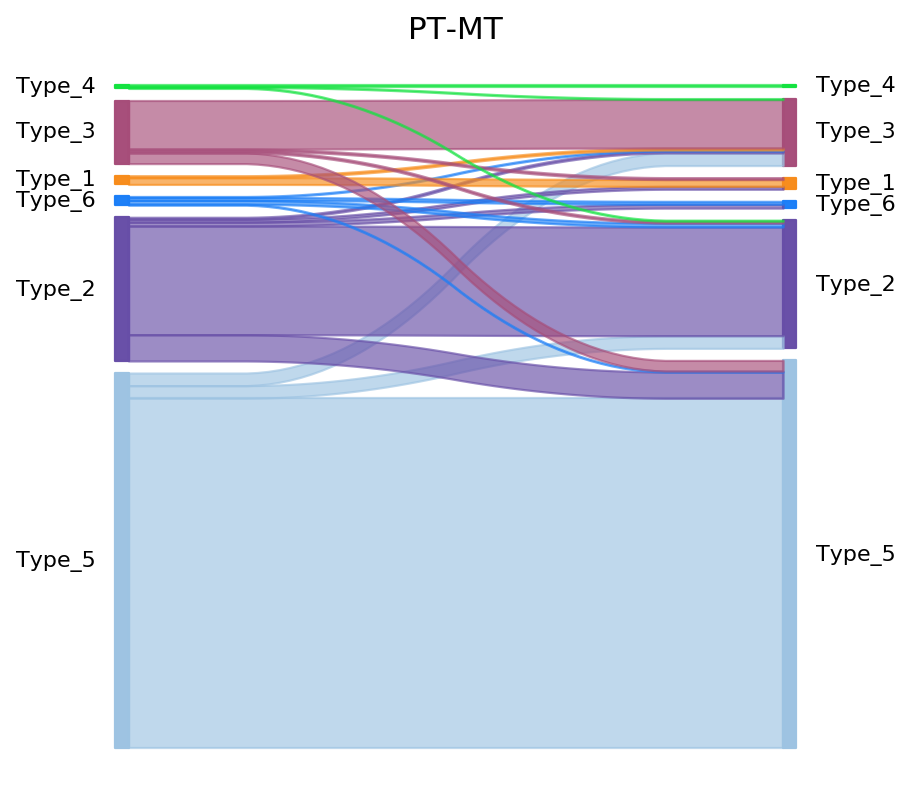

In [ ]:
import matplotlib.pyplot as plt
plt.rc('font', family='sans-serif')
colors = {
    "Type_5": "#9DC3E2",
    "Type_6": "#1b7ef7",
    "Type_3": "#a64d79",
    "Type_4": "#12e23f",
    "Type_1": "#f78c1b",
    "Type_2": "#674ea7",
}
sankey(SL_t["PT_Type"], SL_t["MT_Type"], aspect=20, fontsize=10,colorDict=colors,)

# Get current figure
fig = plt.gcf()

# Set size in inches
fig.set_size_inches(6, 6)

# Set the color of the background to white
fig.set_facecolor("w")
plt.rc('font', family='sans-serif')
plt.rcParams['font.serif']=['sans-serif']
plt.title('PT-MT')
# Save the figure
fig.savefig("customers-goods.png", bbox_inches="tight", dpi=300)

In [ ]:
from google.colab import output
output.enable_custom_widget_manager()

In [ ]:
from google.colab import output
output.disable_custom_widget_manager()